## K-Means Clustering

### Assignment 1 (2 scores):

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma = 
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of intializing centroids randomly to the overall performance of K-means.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import random

In [2]:
np.random.seed(10)

In [3]:
np.set_printoptions(suppress=True)

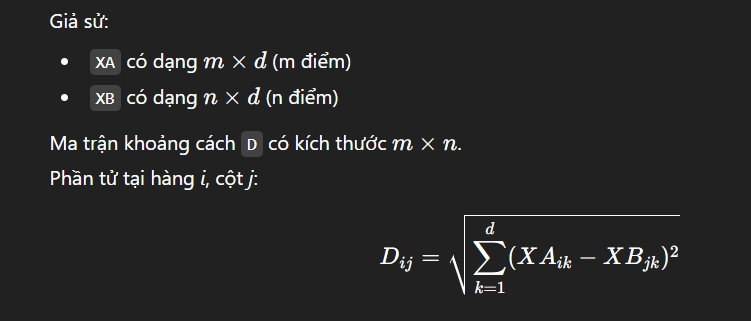

#### Khởi tạo dữ liệu ban đầu

In [4]:
# Kỳ vọng của từng cụm
u0 = [2,2]
u1 = [8,3]
u2 = [3,6]

# Ma trận hiệp phương sai
cov = [[1,0], [0,1]] 
# data 2 chiều nên cov matrix kthuoc 2x2
# quyết định phương sai (mật độ của các điểm) và hướng từng cụm
# nếu gtri trên đg chéo khác nhau => dẹt theo trục có phương sai lớn

# Mỗi cụm 200 điểm
N = 200

In [5]:
# Tạo các điểm dữ liệu
# mỗi Xi kích thước  N x 2 
X0 = np.random.multivariate_normal(u0,cov,N)
X1 = np.random.multivariate_normal(u1,cov,N)
X2 = np.random.multivariate_normal(u2,cov,N)

# X kích thước 600 x 2 
X = np.concatenate([X0, X1, X2], axis=0)

K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N) # nhãn cụm của mỗi điểm N điểm đầu -> 0, N điểm tiếp -> 1, N điểm cuối -> 2 (theo thứ tự trong hàm concatenate) => return mảng (N*3,)

#### Thuật toán Kmeans

In [6]:
def kmeans_display(X, label, centroids=None):
    X0 = X[label==0,:]
    X1 = X[label==1,:]
    X2 = X[label==2,:]

    styles = {
        "markersize": 5, 
        "alpha": 0.8,
        "markeredgecolor": 'k'
    }

    plt.plot(X0[:, 0], X0[:, 1],'b^', label='Cụm 0' , **styles)
    plt.plot(X1[:, 0], X1[:, 1], 'go', label='Cụm 1', **styles)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', label='Cụm 2', **styles)

    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], 
                    marker='X', s=90, c='orange', linewidths=0.5, 
                    label='Centroids', zorder=10)

    plt.axis([-3, 14, -2, 10])
    plt.axis('scaled')
    plt.legend()
    plt.plot()
    plt.show()

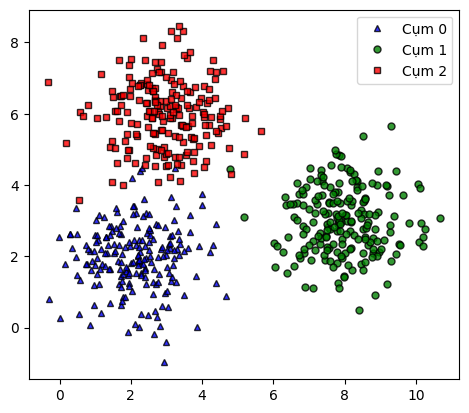

In [7]:
kmeans_display(X,original_label)    

Viết các hàm:
1. kmeans_init_centroids để khởi tạo các điểm đại diện ban đầu
2. kmeans_asign_labels để gán nhãn mới cho các điểm tương ứng với các điểm đại diện
3. kmeans_update_centroids để cập nhật các điểm đại diện mới dựa trên dữ liệu vừa được gán nhãn
4. has_converged để kiểm tra điều kiện dừng của bài toán

In [8]:
def kmeans_init_centroids(X, k):
    # chọn ngẫu nhiên k mẫu dữ liệu (k điểm) từ 600 mẫu dữ liệu (điểm) để làm center ban đầu
    return X[np.random.choice(X.shape[0], k)]

def kmeans_assign_labels(X, centroids):
    # tính khoảng cách của các điểm tới các center
    D = cdist(X, centroids)
    # trả về index của center gần nhất
    return np.argmin(D, axis=1)

def kmeans_update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        Xk = X[labels==k,:]
        # tính lại center
        centroids[k,:] = np.mean(Xk, axis=0)
    return centroids

def has_converged(centroids, new_centroids, tol=1e-6): # tol: sai số
    # nếu centroids = new_centroids -> hội tụ -> dừng
    return np.linalg.norm(centroids - new_centroids) <= tol

In [9]:
def kmeans(X, k, max_iters=100):
    centroids = kmeans_init_centroids(X, k)
    print('='*50)
    print('Tọa độ tâm ban đầu:')
    print(centroids)
    for it in range(1, max_iters + 1):
        labels = kmeans_assign_labels(X, centroids)
        new_centroids = kmeans_update_centroids(X, labels, k)
        if has_converged(centroids, new_centroids):
            break
        centroids = new_centroids
    
    return (centroids, labels, it)

#### Kmeans với dữ liệu ban đầu đã tạo

Tọa độ tâm ban đầu:
[[2.6202545  0.93143229]
 [8.14266929 2.21596444]
 [2.21726515 0.00560623]]
K-means hội tụ sau 6 lần lặp.
Toạ độ các centroids cuối cùng:
[[2.98686864 5.97361989]
 [7.96721295 2.98128265]
 [2.10539793 1.93909392]]


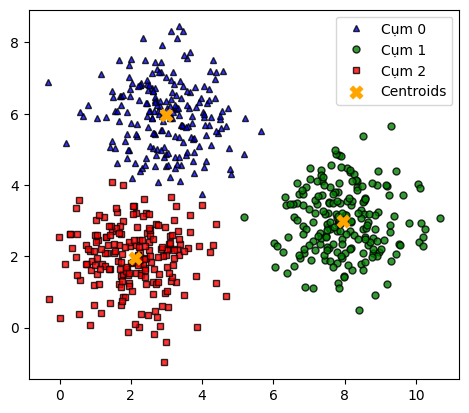

In [10]:
k = 3
centroids, labels, it = kmeans(X, k)

print(f"K-means hội tụ sau {it} lần lặp.")
print("Toạ độ các centroids cuối cùng:")
print(centroids)

kmeans_display(X, labels, centroids)

#### Kmeans với các tâm cụm khởi tạo khác nhau

In [ ]:
def compute_sse(X, centroids, labels):
    """
    Tính tổng bình phương khoảng cách Euclid của các điểm đến tâm cụm
    """
    sse = 0
    for k in range(len(centroids)):
        Xk = X[labels == k,:]
        if len(Xk) > 0:
            sse = sse + np.sum((X[k] - centroids[k])**2)
    return sse

In [12]:
def kmeans_random_centroids(X, k, n_iters=10):
    sses = []

    for i in range(n_iters):
        np.random.seed()
        centroids, labels, it = kmeans(X, k)
        sse = compute_sse(X, centroids, labels)
        sses.append(sse)

        print('='*50)
        print(f'Lần lặp thứ {i + 1}: SSE = {sse:.6f}')
        print(f'Kmeans hội tụ sau {it} lần lặp.')
        print(f'TỌA ĐỘ CÁC CENTROIDS CUỐI CÙNG: ')
        print(centroids)

    print(f'\nTổng kết sau {n_iters} lần lặp:')
    print('SSE:',sses)
    print('Min SSE = ', np.min(sses))
    print('Max SSE = ', np.max(sses))
    

In [13]:
kmeans_random_centroids(X, 3)

Tọa độ tâm ban đầu:
[[0.73018041 2.32338993]
 [1.3600374  2.31383052]
 [1.63750082 1.87809431]]
Lần lặp thứ 1: SSE = 55.847796
Kmeans hội tụ sau 4 lần lặp.
TỌA ĐỘ CÁC CENTROIDS CUỐI CÙNG: 
[[2.10539793 1.93909392]
 [2.98686864 5.97361989]
 [7.96721295 2.98128265]]
Tọa độ tâm ban đầu:
[[7.89112645 4.82078065]
 [2.97414158 4.87565778]
 [6.11514983 2.28248778]]
Lần lặp thứ 2: SSE = 44.529240
Kmeans hội tụ sau 9 lần lặp.
TỌA ĐỘ CÁC CENTROIDS CUỐI CÙNG: 
[[7.96721295 2.98128265]
 [2.98686864 5.97361989]
 [2.10539793 1.93909392]]
Tọa độ tâm ban đầu:
[[1.59427047 2.78177519]
 [3.08522707 2.35693907]
 [8.45206723 3.29406926]]
Lần lặp thứ 3: SSE = 44.936564
Kmeans hội tụ sau 5 lần lặp.
TỌA ĐỘ CÁC CENTROIDS CUỐI CÙNG: 
[[2.98686864 5.97361989]
 [2.10539793 1.93909392]
 [7.96721295 2.98128265]]
Tọa độ tâm ban đầu:
[[2.92703306 5.05760687]
 [7.5890764  3.93083563]
 [2.26607016 4.38496733]]
Lần lặp thứ 4: SSE = 68.855123
Kmeans hội tụ sau 4 lần lặp.
TỌA ĐỘ CÁC CENTROIDS CUỐI CÙNG: 
[[2.98686864 5.9

##### Nhận xét

- min SSE và max SSE chênh lệch rất lớn (khoảng 37.16), chứng tỏ K-means rất nhạy với việc khởi tạo centroids ban đầu.
- Lần lặp 2,3,5,7, SSE khá nhỏ so với các lần khác
- Lần lặp 4,8,9,10, SSE hội tụ xấu, centroinds cuối lệch, có cụm bị gộp sai, đặt giữa hai Gaussian và chia không đều. Ở lần lặp thứ 9, 2 centroid cùng rơi vào Gaussian (8,3) mà Gaussian (3,6) lại bị mất, chứng tỏ gộp sai. 
- Dù hội tụ nhanh nhưng chưa chắc SSE tốt, như lần lặp 1 dù hội tụ nhanh sau 4 lần chạy nhưng SSE lại lớn hơn lần lặp 2 hội tụ sau 9 lần chạy. Tuy vậy lần lặp thứ 9 hội tụ sau 11 lần chạy, nhưng SSE lại cao và các tâm cụm cuối cùng cũng bị lệch.

Kết luận: Khởi tạo tâm cụm ngẫu nhiên ảnh hưởng lớn đến hiệu suất của K-means:
- Nếu tâm cụm ban đầu được chọn gần nhau, có thể khiến thuật toán hội tụ chậm, rơi vào cực trị địa phương (local minimum), khiến cho phân cụm bị sai.
- Nếu được khởi tạo tốt, K-means sẽ hội tụ nhanh, tìm được phân cụm chính xác hơn

### Assignment 2 (2 scores):
- Generate a toy dataset having $50$ points following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $20$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $1000$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma = 
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of different sizes among clusters to the performance of K-means.

#### Khởi tạo dữ liệu ban đầu

Yêu cầu:
- $50$ points following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$
- $20$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$
- $1000$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$
- $\Sigma = 
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.

In [14]:
# Kỳ vọng của từng cụm
u0 = [2,2]
u1 = [8,3]
u2 = [3,6]

# Ma trận hiệp phương sai
cov = [[1,0], [0,1]]

# Số điểm của mỗi cụm
N0 = 50
N1 = 20
N2 = 1000

In [ ]:
X0 = np.random.multivariate_normal(u0,cov,N0)
X1 = np.random.multivariate_normal(u1,cov,N1)
X2 = np.random.multivariate_normal(u2,cov,N2)

# X kích thước 600 x 2 
X = np.concatenate([X0, X1, X2], axis=0)

# số cụm
K = 3

# Nhãn cụm
original_label = np.asarray([0]*N0 + [1]*N1 + [2]*N2)

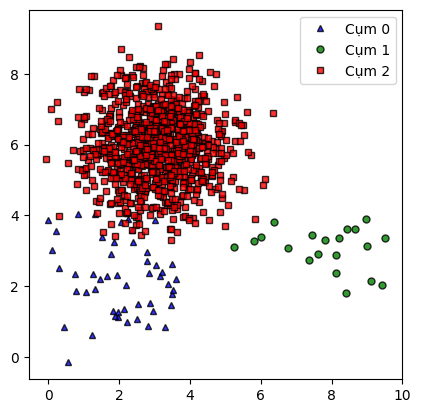

In [19]:
kmeans_display(X,original_label)

#### K-means với tâm cụm ban đầu là ngẫu nhiên

Tọa độ tâm ban đầu:
[[2.22394693 1.00126967]
 [3.6287958  5.33473178]
 [3.04511223 6.13362934]]
K-means hội tụ sau 22 lần lặp.
Toạ độ các centroids cuối cùng:
[[2.27907099 4.05727678]
 [4.45096568 5.3400964 ]
 [2.73980649 6.53695626]]


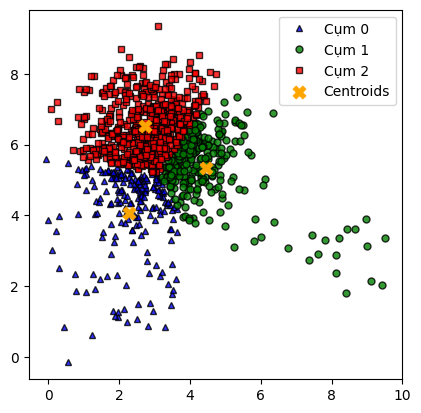

In [18]:
k = 3
centroids, labels, it = kmeans(X, k)

print(f"K-means hội tụ sau {it} lần lặp.")
print("Toạ độ các centroids cuối cùng:")
print(centroids)

kmeans_display(X, labels, centroids)

Nhận xét:
- Với dữ liệu mất cân bằng (chỉ 50 điểm cho cụm 0, 20 điểm cho cụm 1 và tới 1000 điểm cho cụm 2), kết quả K-means không thu được ba cụm tương ứng với ba phân phối ban đầu.
- K-means hội tụ chậm hơn rất nhiều khi dữ liệu mất cân bằng.
- Sau 22 lần lặp, các centroid cuối cùng đều tập trung quanh vùng có mật độ dữ liệu lớn nhất, tức là cụm Gaussian có kỳ vọng (3,6) với số lượng điểm cao nhất (1000 điểm). Trong khi đó, hai cụm có số lượng điểm nhỏ hơn (2,2) và (8,3) không được tách riêng thành các cụm độc lập, mà bị gộp, bị kéo lệch về phía cụm lớn.
- Vì tâm cụm ban đầu được khởi tạo ngẫu nhiên bằng cách chọn ra 3 điểm trong 1070 điểm dữ liệu, vì cụm có kỳ vọng (3,6) có số lượng điểm dữ liệu lớn hơn rất nhiều so với 2 cụm còn lại, nên xác suất chọn ra 2 điểm khởi tạo ban đầu nằm trong 2 cụm còn lại nhỏ hơn rất nhiều so với xác suất chọn ra 2 điểm ở cụm có kỳ vọng (3,6), mà centroids ban đầu ảnh hưởng lớn đến khả năng hội tụ của kmeans, nên khi dữ liệu mất cân bằng thì rất khó để K-means phân cụm tốt.
- K-means tối ưu dựa trên khoảng cách bình phương Euclidean. Với dữ liệu mất cân bằng, cụm lớn chiếm ưu thế trong việc xác định vị trí centroid, làm giảm độ chính xác của cụm nhỏ. Khi dữ liệu bị mất cân bằng, các cụm nhỏ có thể sẽ bị kéo về phía cụm lớn, làm cho phân cụm lệch.
- K-means phân chia dữ liệu thành các cụm có kích thước gần bằng nhau, bất kể phân bố thực tế. Khi dữ liệu mất cân bằng, cụm nhỏ dễ bị gộp chung vào cụm lớn

Kết luận: K-means không phù hợp với dữ liệu có nhãn bị mất cân bằng.

#### K-means với tâm cụm ban đầu là kỳ vọng của các cụm được khởi tạo

In [20]:
def kmeans_with_initialCentroids(X, k, max_iters=100):
    centroids = np.array([
        [2, 2],
        [8, 3],
        [3, 6]
    ])
    print('='*50)
    print('Tọa độ tâm ban đầu:')
    print(centroids)
    for it in range(1, max_iters + 1):
        labels = kmeans_assign_labels(X, centroids)
        new_centroids = kmeans_update_centroids(X, labels, k)
        if has_converged(centroids, new_centroids):
            break
        centroids = new_centroids
    
    return (centroids, labels, it)

Tọa độ tâm ban đầu:
[[2 2]
 [8 3]
 [3 6]]
K-means hội tụ sau 22 lần lặp.
Toạ độ các centroids cuối cùng:
[[2.4222975  4.43970321]
 [6.50150933 3.96173741]
 [3.1842488  6.42051794]]


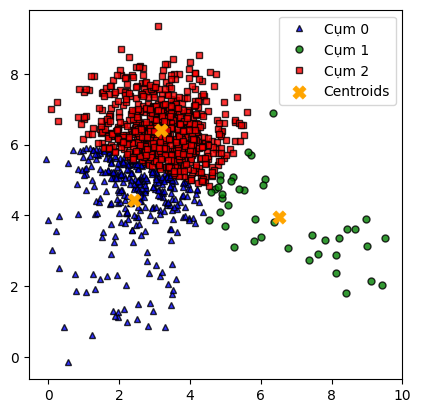

In [21]:
k = 3
centroids, labels, it = kmeans_with_initialCentroids(X, k)

print(f"K-means hội tụ sau {it} lần lặp.")
print("Toạ độ các centroids cuối cùng:")
print(centroids)

kmeans_display(X, labels, centroids)

Nhận xét:
- Với tâm cụm được khởi tạo là các điểm kỳ vọng của từng cụm (rất tốt về lý thuyết), sau khi chạy K-means, centroids cuối cùng không còn trùng với các kỳ vọng ban đầu, mà bị dịch chuyển đáng kể, đặc biệt là centroid gần (8,3). Điều này cho thấy K-means không đảm bảo giữ nguyên cấu trúc cụm ban đầu, ngay cả khi khởi tạo rất tốt.
- Tuy nhiên, tâm cụm 1 không bị kéo quá lệch về cụm 2, dữ liệu cụm 1 cũng không bị phân cụm sai lệch nhiều như khi khởi tạo centroid ngẫu nhiên, cho thấy ảnh hưởng của việc khởi tạo tâm cụm tốt cũng sẽ ảnh hưởng đến kết quả K-means.
- Cụm 0 thì cho kết quả gần giống với khi khởi tạo centroids ban đầu là ngẫu nhiên.

Kết luận: dù tâm cụm ban đầu là lý tưởng nhưng khi dữ liệu mất cân bằng thì K-means hoạt động cũng không tốt.

### Assignment 3 (2 scores):

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma_1)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma_1)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma_2)$ where 

$$
    \Sigma_1 = 
    \left(\begin{array}{cc}
        1 & 0 \\
        0 & 1
    \end{array}\right)
$$ 

and

$$
\Sigma_2 = 
    \left(\begin{array}{cc}
        10 & 0 \\
        0 & 1
    \end{array}\right)
$$.

- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of distribution $\mathcal{N}((3, 6), \Sigma_2)$ to the performance of K-means.

#### Khởi tạo dữ liệu ban đầu

Yêu cầu:
-  $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma_1)$
- $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma_1)$
- $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma_2)$ 
- $$
    \Sigma_1 = 
    \left(\begin{array}{cc}
        1 & 0 \\
        0 & 1
    \end{array}\right)
$$ 



- $$
    \Sigma_2 = 
    \left(\begin{array}{cc}
        10 & 0 \\
        0 & 1
    \end{array}\right)
$$.

In [22]:
# Kỳ vọng của từng cụm
u0 = [2,2]
u1 = [8,3]
u2 = [3,6]

# Ma trận hiệp phương sai
cov1 = [[1,0], [0,1]]
cov2 = [[10,0], [0,1]]
# data 2 chiều nên cov matrix kthuoc 2x2
# quyết định phương sai (mật độ của các điểm) và hướng từng cụm
# nếu gtri trên đg chéo khác nhau => dẹt theo trục có phương sai lớn

# Mỗi cụm 200 điểm
N = 200

In [ ]:
X0 = np.random.multivariate_normal(u0,cov1,N)
X1 = np.random.multivariate_normal(u1,cov1,N)
X2 = np.random.multivariate_normal(u2,cov2,N)

X = np.concatenate([X0, X1, X2], axis=0)

original_label = np.asarray([0]*N + [1]*N + [2]*N)

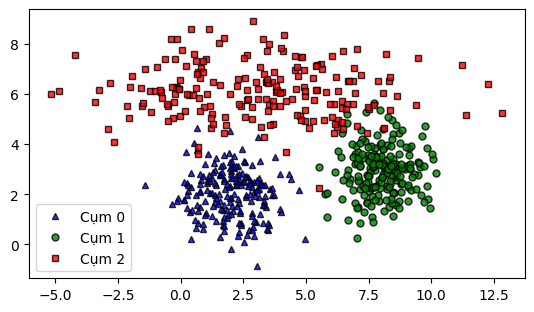

In [25]:
kmeans_display(X,label=original_label)

#### K-means với dữ liệu đã khởi tạo

Tọa độ tâm ban đầu:
[[0.53299632 4.04067532]
 [6.14242569 4.80554016]
 [1.12952553 8.59681463]]
K-means hội tụ sau 6 lần lặp.
Toạ độ các centroids cuối cùng:
[[2.0153472  2.04301357]
 [7.7980268  3.5614185 ]
 [1.55579868 6.2756901 ]]


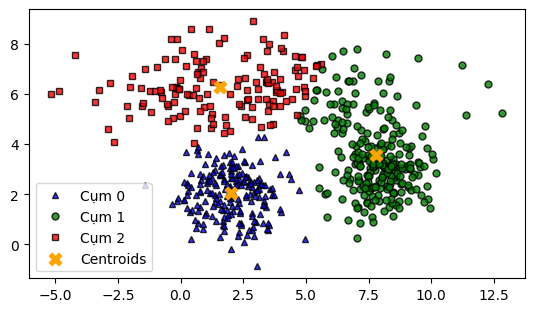

In [24]:
k = 3
centroids, labels, it = kmeans(X, k)

print(f"K-means hội tụ sau {it} lần lặp.")
print("Toạ độ các centroids cuối cùng:")
print(centroids)

kmeans_display(X, labels, centroids)

Nhận xét:
- Cụm dữ liệu tại (3,6) được sinh từ phân phối Gaussian với ma trận hiệp phương sai $$\Sigma_2 = \left(\begin{array}{cc}
        10 & 0 \\
        0 & 1\end{array}\right)$$
cho thấy phương sai theo trục x lớn hơn đáng kể so với hai cụm còn lại. Điều này làm cho cụm ó dạng kéo dài theo phương ngang, không còn gần hình cầu như các cụm có $\Sigma_1$. 

- Kết quả cho thấy, mặc dù K-means vẫn hội tụ nhanh (sau 6 lần lặp) và tìm được ba centroid, nhưng centroids cụm (3,6) bị lệch đáng kể so với kỳ vọng ban đầu. Cụ thể, centroids cuối cùng dịch chuyển về phía các giá trị x nhỏ hơn.

- Nguyên nhân là do K-means giả định các cụm có dạng hình cầu và phương sai tương đương, đồng thời sử dụng khoảng cách Euclid làm thước đo.

- Kết quả này cho thấy sự khác biệt về ma trận hiệp phương sai giữa các cụm làm giảm hiệu năng của K-means, đặc biệt khi dữ liệu vi phạm giả định hình cầu.

Kết luận: K-means nhạy với sự khác biệt về phương sai giữa các cụm và không mô hình hóa tốt các phân phối Gaussian có dạng kéo dài.